In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pygmo import *

In [6]:
# This class was modeled from the pygmo Documentation. 
# This class is required for me to be able to run the PSO algorithm from 'pygmo'
# The 'best_fit' that you see here is declared inside the 'pso_optimizer' function
class F1:
    def __init__(self, given_bias, given_bounds, given_dimensions):
        
        self.given_bias = given_bias
        self.given_bounds = given_bounds 
        self.given_dimensions = given_dimensions

    def fitness(self, x):
        
        global best_fit
        
        F = np.sum(np.square(np.array(x) - np.array(f1_shift_values[:self.given_dimensions]))) + self.given_bias
        best_fit.append(F)
        return [F]

    def get_bounds(self):
        
        return ([self.given_bounds[0]] * self.given_dimensions, [self.given_bounds[1]] * self.given_dimensions)


In [29]:
# Partical Swarm Optimization Function is Defined Below 

def pso_optimizer(given_bias, given_bounds, given_dimensions):
    
####Parameters Intialization
    
    # Population size list
    pop_list = [50, 100, 150]
    
    # omega in pygmo
    inertia_factor_list = [0.3,0.5,0.7,0.9]
    
    # eta1: Congnitive component in pygo
    self_confidence_list = [1,2,3]
    
    # eta2: Socialcomponent in pygmo
    swarm_confidence_list = [1,2,3]
    
    #vcoeff : Maximum Velocity Coefficient with bound width [0,1]
    vcoeff_list = [0.3,0.5,0.7,0.9]
    
    
    
    global best_fit
    current_optimal_fitness_value = np.inf
    # Best fitness results are all saved in these lists
    optimal_parameter_fitness = []
    optimal_parameter_result = []
    optimal_parameter_inertia_factor = []
    optimal_parameter_self_confidence = []
    optimal_parameter_swarm_confidence = []
    optimal_parameter_vcoeff = []
    optimal_parameter_pop = []
    optimal_parameter_best_fit_curve = [] 
    
    
    # Problem Definition in Pygmo
    p = problem(F1(given_bias,given_bounds,given_dimensions))
    
    # The solving part 
    for inertia_factor in inertia_factor_list:
        for self_confidence in self_confidence_list:
            for swarm_confidence in swarm_confidence_list:
                for vcoeff in vcoeff_list:
                    for pop in pop_list:
#                         best_fit = []
                                                
                        #PSO and Population object is defined here 
                        Population = population(p,pop)
                        pso_algo = algorithm(pso(gen=1200)) # I wanted to use more than 1000 but due to 
                                                            #time contraints i can't takes too much time 
                                                            #to run so the results i get with 1200 should do
                        
                        final_result = pso_algo.evolve(Population)
                        
                        # Results are now appended in all of the empty optimal parameter lists that were defined in the above
                        if final_result.champion_f < current_optimal_fitness_value:
                            current_optimal_fitness_value = final_result.champion_f
                            optimal_parameter_fitness.append(final_result.champion_f)
                            optimal_parameter_result.append(final_result.champion_x)
                            optimal_parameter_inertia_factor.append(inertia_factor)
                            optimal_parameter_self_confidence.append(self_confidence)
                            optimal_parameter_swarm_confidence.append(swarm_confidence)
                            optimal_parameter_vcoeff.append(vcoeff)
                            optimal_parameter_pop = pop
                            optimal_parameter_best_fit_curve = best_fit
                            
    print("The Optimal Parameters are printed here below")
    print("Optimal Interia Factor: ", optimal_parameter_inertia_factor )
    print("Optimal Self Confidence: ", optimal_parameter_self_confidence)
    print("Optimal Swarm Confidence: ", optimal_parameter_swarm_confidence)
    print("Optimal Maximum Partical Velocity: ", optimal_parameter_vcoeff)
    print("Optimal Population Size: ", optimal_parameter_pop)
    print("The Best fitness: ", optimal_parameter_fitness)
    print("The optimal Result: ", optimal_parameter_result)

    # For generation 1200 that was specified the min of each swarm
    curve = np.array([np.min(np.array(optimal_parameter_best_fit_curve[i:i+optimal_parameter_pop])) for i in range(0,len(optimal_parameter_best_fit_curve), optimal_parameter_pop)])
    
    plt.plot(curve)
    
    if given_dimensions == 50:
        plt.savefig("curve_dimension_50_pso.png")
        result_df = pd.DataFrame({'solution':optimal_parameter_result}) 
        result_df.to_csv("Result_pso_500.csv")
    
    else:
        plt.savefig("curve_dimension_500_pso.png")
        # Saving solution to csv
        result_df1 = pd.DataFrame({'solution':optimal_parameter_result}) 
        result_df1.to_csv("Result_pso_500.csv")                                     
                
    

Dimension 50 PSO

The Optimal Parameters are printed here below
Optimal Interia Factor:  [0.5]
Optimal Self Confidence:  [3]
Optimal Swarm Confidence:  [3]
Optimal Maximum Partical Velocity:  [0.7]
Optimal Population Size:  100
The Best fitness:  [array([-449.99952326])]
The optimal Result:  [array([ 97.25120665,  77.05996709, -19.0265524 ,  25.42731724,
       -22.91416697,  69.57726953,   5.36900798,  61.48401276,
       -21.29844708,  92.34105565, -93.97692568,  90.74614993,
        42.87642806,  29.30864001, -10.66877323, -65.07472539,
        67.05270587,  94.01695925, -73.01026248, -49.80339986,
        82.00272278,  35.29268063,  24.62891229,   2.44321054,
       -99.30078322, -54.61892469,  95.68917712,  72.24922258,
       -97.12609853,  -2.8396796 , -16.71525857,  54.58153429,
        -2.37438126,   4.51555605,  56.41152669,  18.2469312 ,
       -74.72361602, -78.06190248,  32.58356063,  99.41521581,
       -30.75693322, -64.78863929, -86.42379315, -38.11547856,
       -33.04

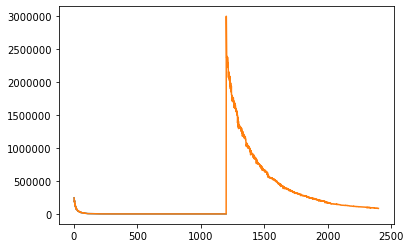

In [30]:
if __name__=="__main__":
    
    f1_shift_values = []
    
    with open('F1_shift_values.txt','r') as f:
        for line in f:
            f1_shift_values.append(float(line[:-1]))
              
    # Parameters for F1

    given_bias = -450
    given_dimensions = (50,500)
    given_bounds = (-100,100)
              
    best_fit = []
              
    print("Dimension 50 PSO\n")
              
    pso_optimizer(given_bias, given_bounds, given_dimensions[0])
              
    print("Dimension 500 PSO\n")
              
    pso_optimizer(given_bias, given_bounds, given_dimensions[1])